In [17]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn as nn
import torch.functional as F
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_pts = 500
X,y = datasets.make_circles(n_samples = n_pts, random_state=123, noise = 0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))


[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

In [3]:
def scatter_plot():
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])
    plt.show()

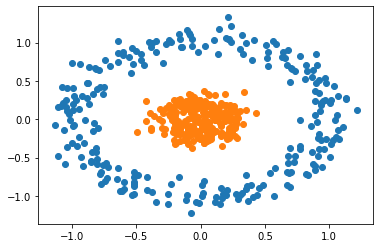

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    
    def __init__(self, input_size,H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1,output_size)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred>=0.5:
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [8]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('Epoch:',i,'Loss:',loss.item())
    
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

Epoch: 0 Loss: 0.7148522138595581
Epoch: 1 Loss: 0.6947312355041504
Epoch: 2 Loss: 0.6955161094665527
Epoch: 3 Loss: 0.7014897465705872
Epoch: 4 Loss: 0.7013992667198181
Epoch: 5 Loss: 0.697472095489502
Epoch: 6 Loss: 0.6939275860786438
Epoch: 7 Loss: 0.6928625106811523
Epoch: 8 Loss: 0.693941593170166
Epoch: 9 Loss: 0.6954426765441895
Epoch: 10 Loss: 0.6958808302879333
Epoch: 11 Loss: 0.6949241757392883
Epoch: 12 Loss: 0.693157970905304
Epoch: 13 Loss: 0.6914014220237732
Epoch: 14 Loss: 0.6901755332946777
Epoch: 15 Loss: 0.6894776225090027
Epoch: 16 Loss: 0.6888664364814758
Epoch: 17 Loss: 0.6877952814102173
Epoch: 18 Loss: 0.6859349012374878
Epoch: 19 Loss: 0.6832882165908813
Epoch: 20 Loss: 0.6800878047943115
Epoch: 21 Loss: 0.6766111850738525
Epoch: 22 Loss: 0.6730255484580994
Epoch: 23 Loss: 0.6693331003189087
Epoch: 24 Loss: 0.6653967499732971
Epoch: 25 Loss: 0.661038875579834
Epoch: 26 Loss: 0.6561349034309387
Epoch: 27 Loss: 0.6506633758544922
Epoch: 28 Loss: 0.6446858048439026

Epoch: 361 Loss: 0.007317631039768457
Epoch: 362 Loss: 0.007288111839443445
Epoch: 363 Loss: 0.007258778437972069
Epoch: 364 Loss: 0.007229636423289776
Epoch: 365 Loss: 0.0072006783448159695
Epoch: 366 Loss: 0.0071718948893249035
Epoch: 367 Loss: 0.007143300957977772
Epoch: 368 Loss: 0.007114879786968231
Epoch: 369 Loss: 0.007086633238941431
Epoch: 370 Loss: 0.007058566436171532
Epoch: 371 Loss: 0.007030673790723085
Epoch: 372 Loss: 0.007002951577305794
Epoch: 373 Loss: 0.006975408177822828
Epoch: 374 Loss: 0.006948026362806559
Epoch: 375 Loss: 0.006920811720192432
Epoch: 376 Loss: 0.006893764715641737
Epoch: 377 Loss: 0.006866887211799622
Epoch: 378 Loss: 0.006840172223746777
Epoch: 379 Loss: 0.006813623942434788
Epoch: 380 Loss: 0.006787226535379887
Epoch: 381 Loss: 0.006761002354323864
Epoch: 382 Loss: 0.006734928581863642
Epoch: 383 Loss: 0.006709010805934668
Epoch: 384 Loss: 0.006683252286165953
Epoch: 385 Loss: 0.006657648365944624
Epoch: 386 Loss: 0.006632191129028797
Epoch: 387

Epoch: 661 Loss: 0.0029711457900702953
Epoch: 662 Loss: 0.002964529674500227
Epoch: 663 Loss: 0.0029579387046396732
Epoch: 664 Loss: 0.0029513705521821976
Epoch: 665 Loss: 0.002944829873740673
Epoch: 666 Loss: 0.002938315039500594
Epoch: 667 Loss: 0.0029318188317120075
Epoch: 668 Loss: 0.002925351494923234
Epoch: 669 Loss: 0.0029189048800617456
Epoch: 670 Loss: 0.0029124843422323465
Epoch: 671 Loss: 0.0029060926754027605
Epoch: 672 Loss: 0.0028997191693633795
Epoch: 673 Loss: 0.002893372904509306
Epoch: 674 Loss: 0.0028870441019535065
Epoch: 675 Loss: 0.0028807418420910835
Epoch: 676 Loss: 0.002874462166801095
Epoch: 677 Loss: 0.0028682078700512648
Epoch: 678 Loss: 0.0028619770891964436
Epoch: 679 Loss: 0.002855767263099551
Epoch: 680 Loss: 0.002849582117050886
Epoch: 681 Loss: 0.0028434176929295063
Epoch: 682 Loss: 0.002837275853380561
Epoch: 683 Loss: 0.0028311547357589006
Epoch: 684 Loss: 0.002825060859322548
Epoch: 685 Loss: 0.00281898258253932
Epoch: 686 Loss: 0.002812928520143032

Epoch: 947 Loss: 0.0017422378296032548
Epoch: 948 Loss: 0.0017394601600244641
Epoch: 949 Loss: 0.001736690872348845
Epoch: 950 Loss: 0.0017339285695925355
Epoch: 951 Loss: 0.0017311724368482828
Epoch: 952 Loss: 0.0017284225905314088
Epoch: 953 Loss: 0.0017256784485653043
Epoch: 954 Loss: 0.0017229450168088078
Epoch: 955 Loss: 0.0017202150775119662
Epoch: 956 Loss: 0.001717489561997354
Epoch: 957 Loss: 0.0017147761536762118
Epoch: 958 Loss: 0.0017120643751695752
Epoch: 959 Loss: 0.0017093613278120756
Epoch: 960 Loss: 0.0017066638683900237
Epoch: 961 Loss: 0.001703975722193718
Epoch: 962 Loss: 0.001701293047517538
Epoch: 963 Loss: 0.0016986164264380932
Epoch: 964 Loss: 0.0016959479544311762
Epoch: 965 Loss: 0.0016932833241298795
Epoch: 966 Loss: 0.0016906263772398233
Epoch: 967 Loss: 0.0016879758331924677
Epoch: 968 Loss: 0.0016853318084031343
Epoch: 969 Loss: 0.001682695816271007
Epoch: 970 Loss: 0.0016800640150904655
Epoch: 971 Loss: 0.001677440362982452
Epoch: 972 Loss: 0.001674822298

Text(0.5, 0, 'epochs')

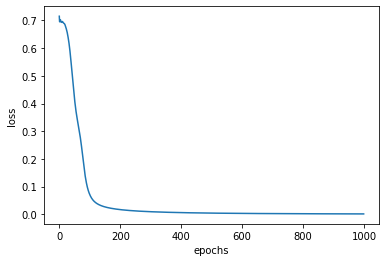

In [9]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [14]:
def plot_decision_boundary(X,y):
    x_span = np.linspace(min(X[:,0]),max(X[:,0]))
    y_span = np.linspace(min(X[:,1]),max(X[:,1]))
    xx ,yy = np.meshgrid(x_span, y_span)
    grid = torch.tensor(np.c_[xx.ravel(),yy.ravel()])
    pred_func = model.double().forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

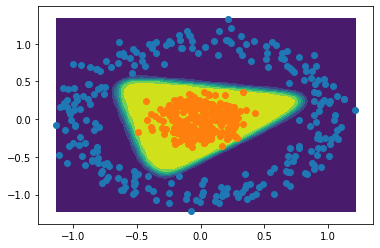

In [15]:
plot_decision_boundary(X,y)
scatter_plot()